 ## Regression Trees, Bagging, Random Forests, Boosting
### Group 15 - Problem Set 8 - 07/07/21

#### The aim of this exercise: 

*Compare prediction properties* of a normal regression classiﬁcation tree with ensemble methods. You can use pre-installed packages such as caret for boosting.

#### Exercise 1

Consider the following data generating process in which we have $n = 500$ observations and p covariates
$X_j ∼ N (0, σ_j^2$) for $j = 1, . . . , p$. The values of $p$ and $σ_j^2$ are chosen by you (be ready to have some basic
explanation). Response variable $y$ is generated by some nonlinear function of $X$ that should include some
(possibly higher order) interaction terms. Again, the choice of the speciﬁc function is up to you.

1. Generate the data according to the dgp described above and ﬁt a classiﬁcation tree with optimal pruning and a boosted tree.
2. Compare the test classiﬁcation errors for both methods.

### Packages used

In [142]:
install.packages("tree")
install.packages("caret")
install.packages("e1071")
install.packages("ggplot2")
install.packages("ipred")
install.packages("rpart")

Warning message:
"package 'tree' is in use and will not be installed"
Warning message:
"package 'caret' is in use and will not be installed"
Warning message:
"package 'e1071' is in use and will not be installed"
Warning message:
"package 'ggplot2' is in use and will not be installed"


### Data Generating Process

- When choosing the number of covariates, we decided to take four normally distributed regressors with mean $0$ and different variances $σ_j^2$ so that our data generating process is more complex and we have more splits in the classification tree. 

- For the data generating process, we chose a non-linear function where $X_2$ and $X_3$ are interacted and $X_4$ is squared. 

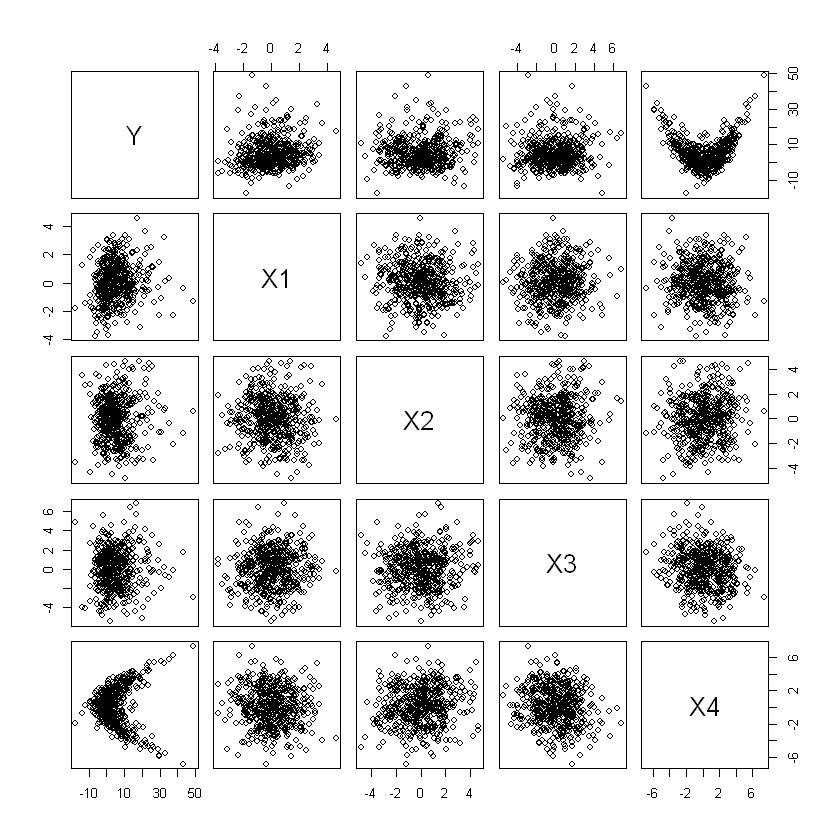

In [2]:
set.seed(123)                           #setting the seed
n<-500                                  #number of observations
beta<-c(1.5,-1.5,1.5,-1.5)              #parameters

dgp<-function(n,beta){                  #4 normally distributed regressors with mean 0 and different variance
  X1 <- rnorm(n, 0, sd=sqrt(2))
  X2 <- rnorm(n, 0, sd=sqrt(3))
  X3 <- rnorm(n, 0, sd=sqrt(4))
  X4 <- rnorm(n, 0, sd=sqrt(5))  
  eps <- rnorm(n,0,sd=sqrt(10))         #normally distributed error term with mean 0 and variance 10
Y <-  X1 + X2 * X3 + ((X4)^2) + eps     #non-linear function
data<- data.frame("Y"=Y,"X1"=X1,"X2"=X2,"X3"=X3,"X4"=X4)
return(data)
}

data <- dgp(n,beta)                     #storing the data from the above data generating process
plot(data)

### Splitting the Data into Train and Test

- We do an 80-20 split where 80% is the train data and 20% is our test data.

In [4]:
sample <- sample.int(n = nrow(data), size = floor(.80*nrow(data)), replace = F) #80-20 split
train <- data[sample, ]                                                         #train data
test  <- data[-sample, ]                                                        #test data

train 
test

,Y,X1,X2,X3,X4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
423,10.6489937,0.1786376,-0.06328433,0.5851174,-3.50425415
334,3.8731221,2.1484983,2.62663877,-0.4284231,-2.46005987
406,29.5799467,-2.3342253,-1.08178260,2.5898916,-5.82280637
216,5.2191459,2.3697933,1.94868168,1.6515817,-0.90272371
498,-4.8147554,0.2331202,-2.34017451,2.0375159,0.62038994
57,-1.3691456,-2.1902672,-0.08885055,-1.6129056,0.94893983
198,-4.7336900,-1.7695649,-0.16879052,2.9056346,-0.66765163
473,7.0994866,-1.8709354,-2.59582152,-1.9340638,-0.50116097
408,-1.1144471,1.0697202,-0.08412285,2.7293456,-1.98220273


,Y,X1,X2,X3,X4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,22.7620329,2.42546816,-0.16480022,2.0811469,4.7565941
12,16.8289127,0.50885359,0.37438718,5.6644520,-3.4834695
17,-2.7273612,0.70406690,-0.22828913,0.4550855,-0.6169099
23,3.4213630,-1.45098941,-1.20970008,2.7971440,-1.3215546
27,19.1783819,1.18480980,2.14198532,3.3070945,3.4266034
31,10.1595912,0.60311149,1.04853276,-2.3938704,3.9399985
41,6.3065254,-0.98246403,-0.47327960,-2.0446947,2.4851221
42,1.1755771,-0.29403943,-0.81181183,1.2122605,0.6242226
43,-7.2062626,-1.78954068,1.21965351,-0.1778611,-0.1703228


### Creating the outcome dummy variable

- "A classiﬁcation tree is very similar to a regression tree except that it is used to predict a qualitative response rather than a quantitative one. Recall that for a regression tree the predicted response for an observation isgiven by the mean response of the training observations that belong to the same terminal node. In contrast, for a classiﬁcation tree, we predict that each observation belongs to the most commonly occurring class of trainingobservations in the region to which it belongs."(James, Witten, Hastie, Robert, 2013, p. 311)

- Therefore, we decided to create a dummy variable based on the generated data, where $Y$ takes the value of "False" if $Y\leq\ E(Y)$, and "True" if $Y>E(Y)$.



In [145]:
#Building Classification Tree
#Turn Y-variable into a dummy:
library(tree)
print("Mean of Y")
mean(train$Y)                                   #taking the mean from Y variable

dummy <-ifelse(train$Y<=mean(train$Y),F,T)      #creating the dummy variable for the train data
dummy.test <-ifelse(test$Y<=mean(train$Y),F,T)  #creating the dummy variable for the test data

dummy <-as.factor(dummy)                        #changing into categorial variables
dummy.test <- as.factor(dummy.test)

#dummy
#dummy.test

#Add new outcome dummy variable of Y into two datasets (train and test)
  Ybin<-data.frame(train,dummy)
  #Ybin
  Ybin.test <- data.frame(test,dummy.test)
  #Ybin.test

[1] "Mean of Y"


[1] 5.275491

### Building Classification Tree

- Fitting the tree on the train data. 


Classification tree:
tree(formula = dummy ~ X1 + X2 + X3 + X4, data = Ybin)
Number of terminal nodes:  19 
Residual mean deviance:  0.5036 = 191.9 / 381 
Misclassification error rate: 0.11 = 44 / 400 

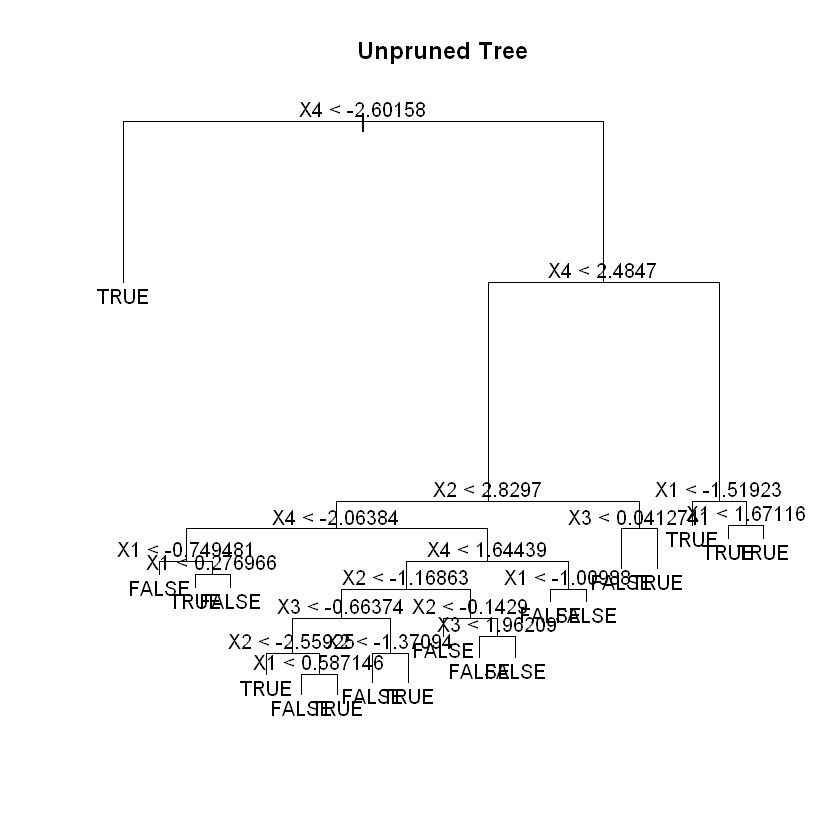

In [6]:
#Fitting a Classification Tree on new dummy variable
tree.fit<-tree(dummy~X1+X2+X3+X4,data=Ybin)       
summary<-summary(tree.fit)                       # summary of the tree, this shows us the number of terminal nodes and
                                                 # misclassification error.
summary                                     

plot(tree.fit)                                   #plotting the tree
text(tree.fit, pretty=0)                        
title(main="Unpruned Tree")

### Misclassification error rate on the training and test set

-   "In the classification setting, RSS cannot be used as a criterion for making the binary splits.A natural alternative to RSS is the classification error rate. Since we plan classification to assign an observation in a given region to the most commonly occurring error rate class of training observations in that region, the classification error rate is simply the fraction of the training observations in that region that do not belong to the most common class."                  
(James, Witten, Hastie, Robert, 2013, p. 311) 
-  The formula for Misclassification error rate: $E = 1 − max_k (\hat{p}_{mk}).$
-  We could have used the Gini Index or the Cross-Entropy Index instead of the Misclassification Error to grow the tree. These measure the purity of the terimnal nodes which make the process more sensitive for tree growing.


In [8]:
trainerror.vector<-summary$misclass                         
#trainerror.vector
#length(trainerror)
trainerror.tree<-trainerror.vector[1]/trainerror.vector[2]
print("Misclassification error on the Training Set, Unpruned Tree")
trainerror.tree                               #Misclassification error for training data >> low due to to overfitting

[1] "Misclassification error on the Training Set"


[1] 0.11

In [10]:
#Test how good the fitted tree does on the Test data
tree.pred<-predict(tree.fit,Ybin.test,type="class")
#tree.pred
table<-table(tree.pred,dummy.test)
table

corrpred<-(table[1,1]+table[2,2])/(table[1,1]+table[2,2]+table[1,2]+table[2,1]) 
print("Accuracy")
corrpred                                                #share of correct predictions in mth region from kth class(Accuracy) 
testerror.tree<-1-corrpred 
print("Misclassification error on the Test Set, Unpruned Tree ")
testerror.tree                                          #misclassification error for test data, Unpruned Tree

         dummy.test
tree.pred FALSE TRUE
    FALSE    45   14
    TRUE      8   33

[1] "Accuracy"


[1] 0.78

[1] "Misclassification error on the Test Set"


[1] 0.22

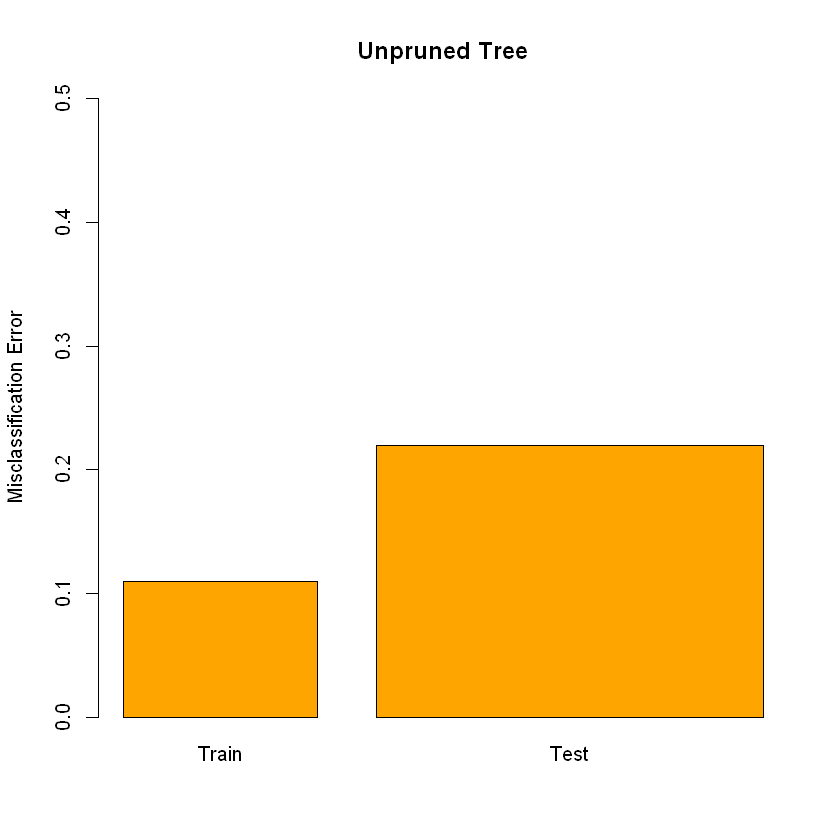

In [11]:
#Comparison Misclassification Errors Unpruned Tree
error.tree <- c(trainerror.tree,testerror.tree)         #plotting them together
barplot(error.tree, main="Unpruned Tree", ylim=c(0,0.5),
        ylab="Misclassification Error", names.arg = c("Train","Test"), col="orange",height=error.tree)


-  The graph above shows that the misclassification error on the test data is higher than on the train data because the model was trained on the training data and is tested on the "hidden" test data.

### Pruning

The process above may produce good predictions on the training set, but is likely to overfit, leading to poor test set performance.
 
- Therefore, what we do is grow a very large tree $T_0$, and then prune it back to obtain a subtree. Our goal is to select a subtree that leads to the lowest test error rate. Given a subtree, we can estimate its test error using cross-validation or the validation set approach.(see Lecture notes)

- We use the argument FUN=prune.misclass in order to indicate that we want the classification error rate to guide the cross-validation and pruning process, rather than the default for the cv.tree() function, which is deviance.

$size
[1] 19 14 13  7  5  3  1

$dev
[1]  77  77  70  72  74  77 158

$k
[1] -Inf  0.0  1.0  2.0  3.0  4.5 45.5

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

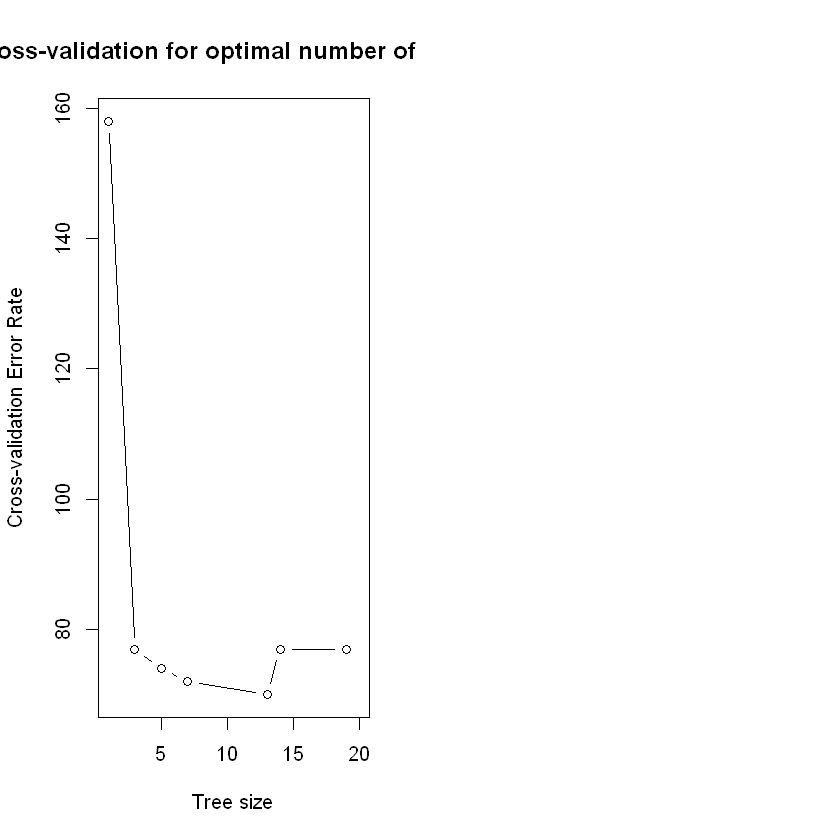

In [146]:
set.seed(231)
#Cross-Validation to choose number of terminal nodes
pruned<-cv.tree(tree.fit,FUN=prune.misclass,K=10) #FUN=prune.misclass uses classification error rate instead of deviance to prune
pruned

#plot the classification error rate as a function of size and k
par(mfrow=c(1,2))
plot(pruned$size,pruned$dev,type="b", xlim=c(1,20), xlab= "Tree size", ylab = "Cross-validation Error Rate", main= "Cross-validation for optimal number of nodes")

-  We choose the optimal number of terminal nodes based on the cross-validation method, ours in this case is 13.

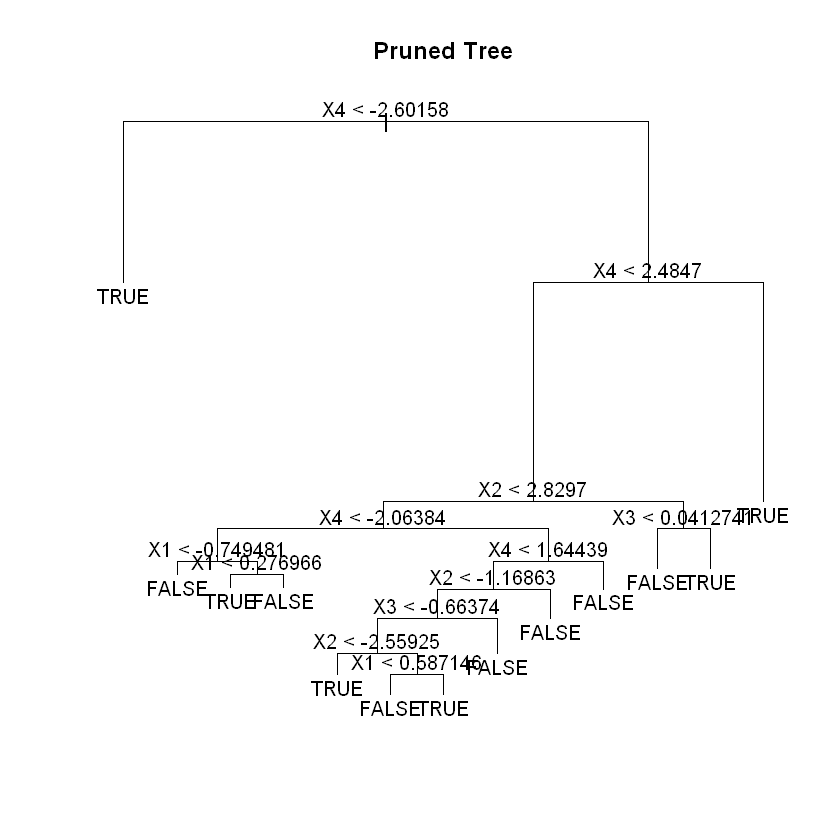

In [13]:
#Actual Pruning

pruned.tree<-prune.misclass(tree.fit,best=13) # manually plugging the number of nodes from the cross-validation above
plot(pruned.tree)                             # plotting the treee
text(pruned.tree,pretty=0)
title(main="Pruned Tree")

-  We repeat the same test procedure for the pruned tree and calculate the misclassification error rate on test and train data.

In [16]:
#Misclassification error for Pruned Tree on Train Data

tree.fit.pruned.train <-predict(pruned.tree,Ybin,type="class")       #based on the train data

table.pr.train<-table(tree.fit.pruned.train,dummy)                   
table.pr.train

corrpred.pr.train<-(table.pr.train[1,1]+table.pr.train[2,2])/(table.pr.train[1,1]+table.pr.train[2,2]+table.pr.train[1,2]+table.pr.train[2,1]) 
print("Accuracy, Pruned Tree")
corrpred.pr.train  #share of correct predictions
trainerror.pruned <-1-corrpred.pr.train
print("Misclassification error on the Training Data, Pruned Tree")
trainerror.pruned

                     dummy
tree.fit.pruned.train FALSE TRUE
                FALSE   225   33
                TRUE     12  130

[1] "Accuracy, Pruned Tree"


[1] 0.8875

[1] "Misclassification error on the Training Data, Pruned Tree"


[1] 0.1125

In [17]:
#Misclassification error for Pruned Tree on Test Data

#Test how good the pruned fitted tree does on Test data
tree.fit.pruned<-predict(pruned.tree,Ybin.test,type="class")
#tree.pred
table.pr<-table(tree.fit.pruned,dummy.test)
table.pr

corrpred.pr<-(table.pr[1,1]+table.pr[2,2])/(table.pr[1,1]+table.pr[2,2]+table.pr[1,2]+table.pr[2,1]) 
print("Accuracy, Pruned Tree")
corrpred.pr  #share of correct predictions
testerror.pruned<-1-corrpred.pr
print("Misclassification error on the Test Data, Pruned Tree")
testerror.pruned #Misclassification error for Pruned Tree on Test Data


               dummy.test
tree.fit.pruned FALSE TRUE
          FALSE    49   14
          TRUE      4   33

[1] "Accuracy, Pruned Tree"


[1] 0.82

[1] "Misclassification error on the Test Data, Pruned Tree"


[1] 0.18

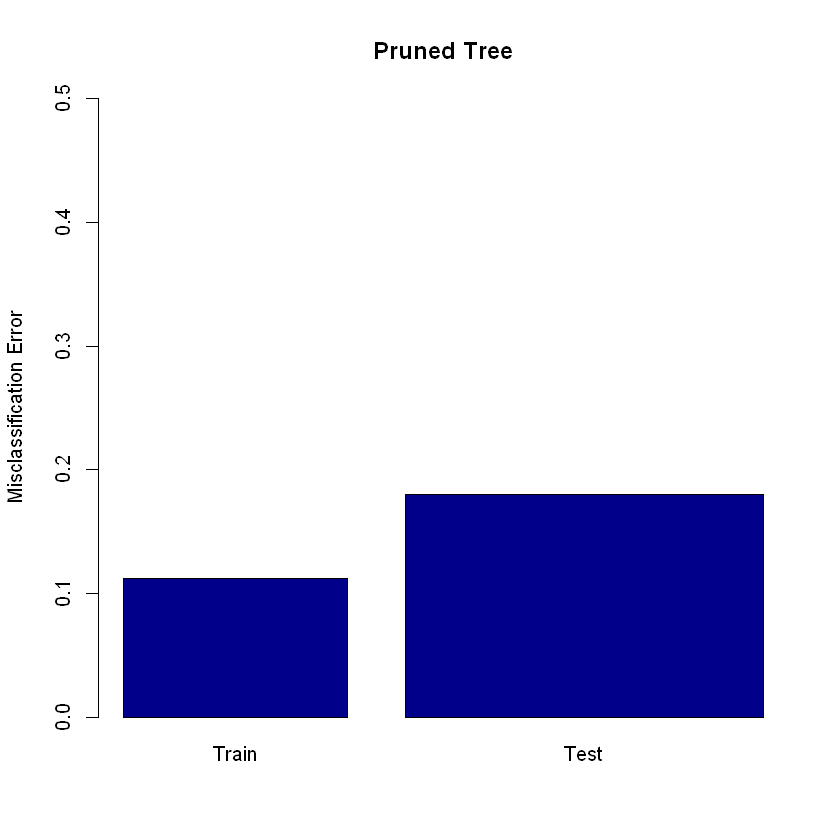

In [18]:
#Comparison Misclassification Errors Pruned Tree
error.pruned <- c(trainerror.pruned,testerror.pruned)
barplot(error.pruned, main="Pruned Tree", ylim=c(0,0.5),
        ylab="Misclassification Error", names.arg = c("Train","Test"), col="darkblue",height=error.pruned)

### Boosted Tree

-  "With Boosting, the trees are grown sequentially: each tree is grown using information from previously grown trees. Unlike fitting a single large decision tree to the data, which amounts to fitting the data hard and potentially overfitting, the boosting approach instead learns slowly." (James, Witten, Hastie, Robert, 2013, p. 322)
-  It converts weak learners to strong learners.

Stochastic Gradient Boosting 

400 samples
  4 predictor
  2 classes: 'FALSE', 'TRUE' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 361, 360, 360, 361, 360, 359, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  Accuracy   Kappa    
  1                   50      0.8057286  0.5844295
  1                  100      0.8041046  0.5835123
  1                  150      0.8040843  0.5847955
  2                   50      0.8124177  0.6023722
  2                  100      0.8273181  0.6357258
  2                  150      0.8407197  0.6636986
  3                   50      0.8273374  0.6350290
  3                  100      0.8357583  0.6549271
  3                  150      0.8357786  0.6552331

Tuning parameter 'shrinkage' was held constant at a value of 0.1

Tuning parameter 'n.minobsinnode' was held constant at a value of 10
Accuracy was used to select the optimal model using the largest value.
The final valu

,var,rel.inf
,<chr>,<dbl>
X4,X4,56.28448
X2,X2,20.42965
X1,X1,12.33489
X3,X3,10.95098


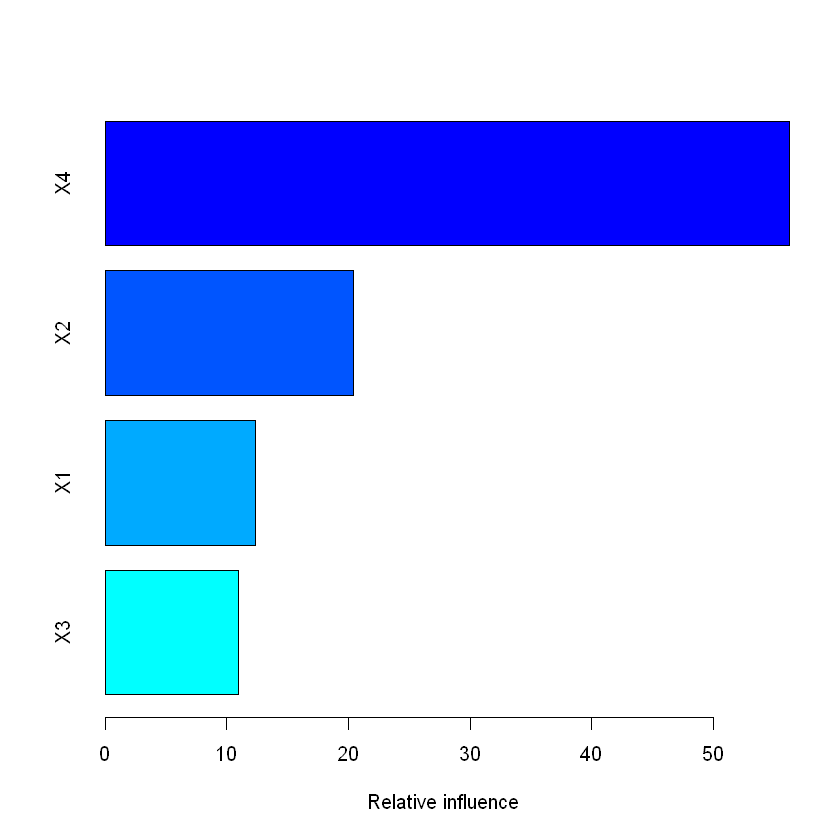

In [151]:
set.seed(231)

library(caret)
library(e1071)

tree.gbm <- caret::train(dummy ~ X1+X2+X3+X4,                             #creating a boosted tree
                          data = Ybin,
                          method = "gbm",                                 #gbm-boosting method
                          trControl = trainControl(method = "repeatedcv", 
                                                  number = 10,            #10 fold cross validation 
                                                  repeats=3,              #number of repeats
                                                  verboseIter = FALSE),
                                                  verbose = 0)
tree.gbm
summary(tree.gbm)                                                         #summary from the boosted tree

-  As we can see above, $X_4$ is the most important variable for growing our model. 

In [21]:
#Classification Error= 1 - Accuracy
trainerror.boost<-1- 0.8407197 
print("Misclassification Error on the Train Data, Boosted Tree")
trainerror.boost                                           #Misclassification error for boosted tree, train data


[1] "Misclassification Error on the Train Data, Boosted Tree"


[1] 0.1592803

In [22]:
#Test how good the boosted fitted tree does on Test data
matrix <- caret::confusionMatrix(
  data = predict(tree.gbm, Ybin.test),
  reference = Ybin.test$dummy.test)

table.boost <- matrix$table                                 #creating a table to extract the misslasification error            
table.boost                                                 #table with predictions

corrpred.boost<-(table.boost[1,1]+table.boost[2,2])/(table.boost[1,1]+table.boost[2,2]+table.boost[1,2]+table.boost[2,1]) 
print("Accuracy, Boosted Tree")
corrpred.boost                                              #share of correct predictions
testerror.boost<-1-corrpred.boost
print("Misclassifictaion Error on the Test Data, Boosted Tree")
testerror.boost                                             #Misclassification error for boosted tree, test data

          Reference
Prediction FALSE TRUE
     FALSE    52   14
     TRUE      1   33

[1] "Accuracy, Boosted Tree"


[1] 0.85

[1] "Misclassifictaion Error on the Test Data, Boosted Tree"


[1] 0.15

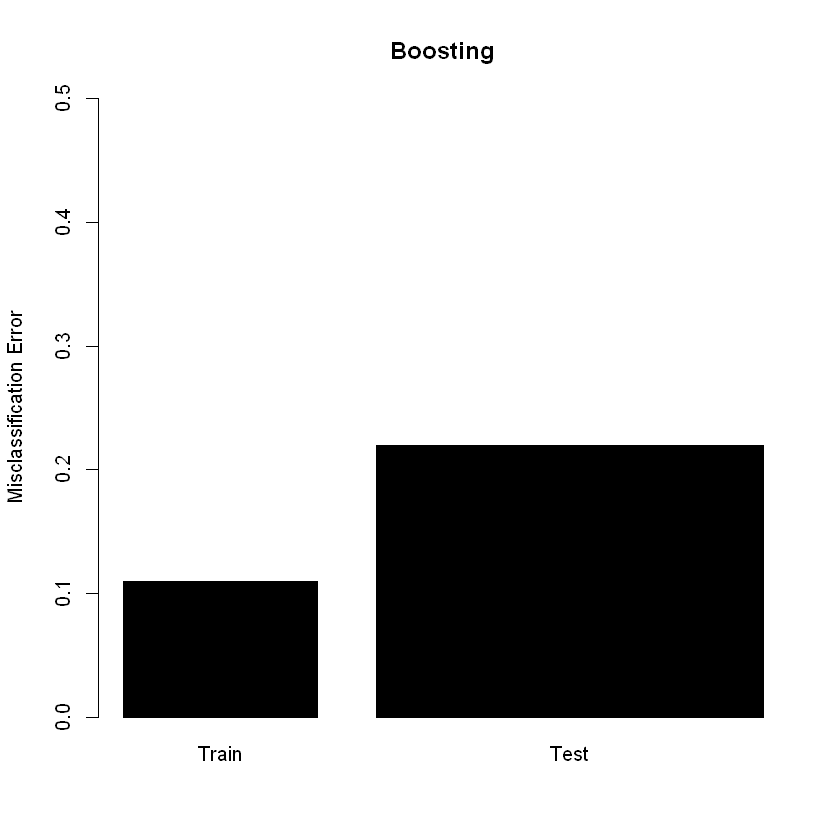

In [23]:
#Comparison of the Misclassification Errors for Boosted Tree

error.boost <- c(trainerror.boost,testerror.boost)              #plotting
barplot(error.tree, main="Boosting", ylim=c(0,0.5),
        ylab="Misclassification Error", names.arg = c("Train","Test"), col="black",height=error.tree)

### Comparison of the missclassifcation errors for all methods

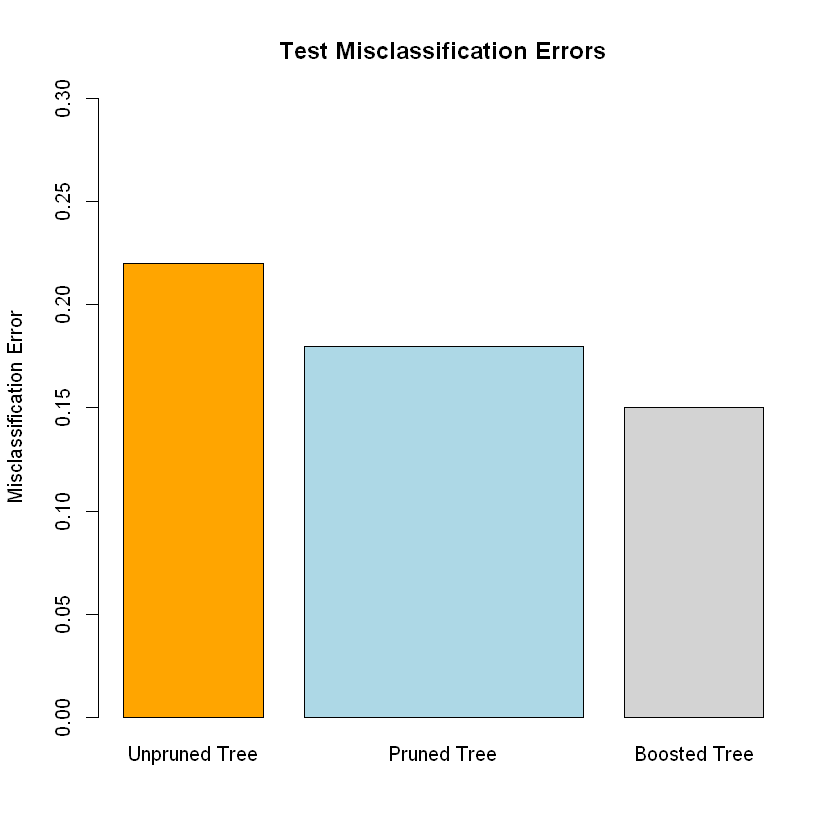

In [24]:
# Misslcassification errors
error.test <- c(testerror.tree,testerror.pruned,testerror.boost)           
barplot(error.tree, main="Test Misclassification Errors", ylim=c(0,0.3),            #plotting
        ylab="Misclassification Error", names.arg = c("Unpruned Tree","Pruned Tree", "Boosted Tree"), col=c("orange", "lightblue", "lightgrey"),height=error.test)

-  Here we can observe that the methods of Pruning and Boosting improve the prediction performance. 
-  Boosted trees are more generalizable than a single tree because the boosted tree utilizes multiple weak learners (trees) compared to a decision tree’s single strong learner. 
-  A pruned tree reduces overfitting at the cost of accuracy by removing nodes, whereas boosted trees get that accuracy and no overfitting for free by spreading out the decision making.

#### Exercise 2 (Simulation Study)

The goal here is to think about the way how a regression tree makes its predictions and how boosting improves these properties.

1. Propose a dgp that will improve the boosting classiﬁcation error vs. the traditional regression tree. Illustrate the properties of your dgp in some simpliﬁed graphs.
2. Propose and implement another ensemble method of your choice (either bagging or random forests) and benchmark these methods against boosting within the framework above.



### New Data Generating Process

- Here we have another data generating process, where we added more regressors and took out the interaction term. Additionally, we squared additional term, $X_5$. 
- Our idea was to increase the complexity of the input data but make the regressors more independent. We did this because boosting should be well suited for more complex data with indipendent regressors where the unpruned tree should perform worse due to the increased complexity.

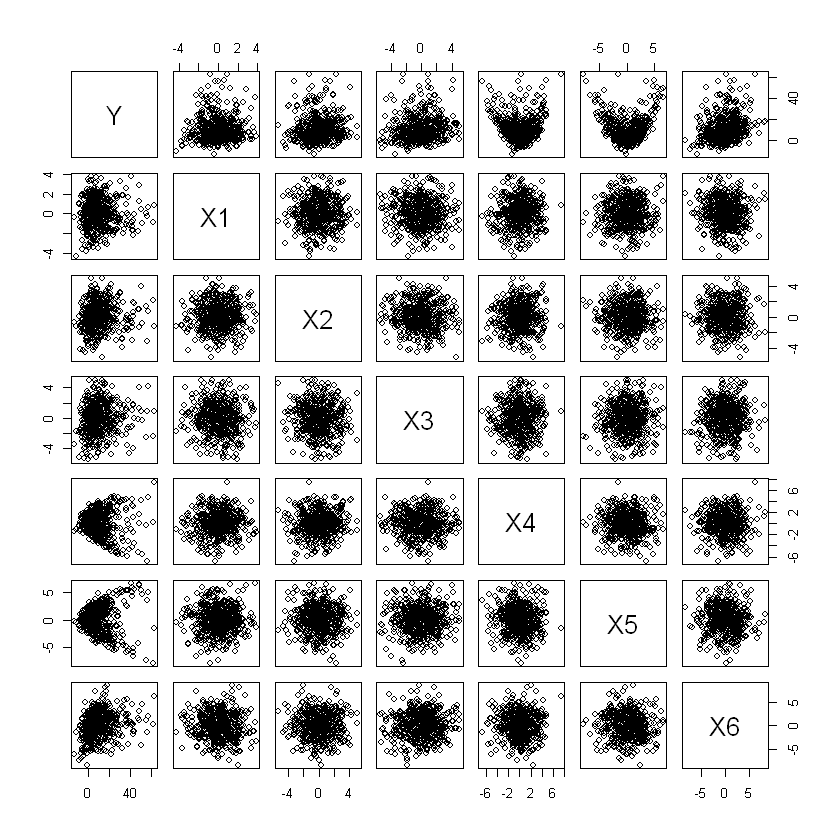

In [116]:
set.seed(23)                                      #setting the seed
n2<-500                                           #number of observations
beta2<-c(1.5,-1.5,1.5,-1.5,1.5,-1.5)              

################
dgp2 <-function(n2,beta2){  
  X1 <- rnorm(n2, 0, sd=sqrt(2))                  #6 normally distributed regressors with mean 0
  X2 <- rnorm(n2, 0, sd=sqrt(3))                  # adding two more regressors
  X3 <- rnorm(n2, 0, sd=sqrt(4))
  X4 <- rnorm(n2, 0, sd=sqrt(5))
  X5 <- rnorm(n2, 0, sd=sqrt(6))
  X6 <- rnorm(n2, 0, sd=sqrt(7))
  eps <- rnorm(n2,0,sd=sqrt(10))                  #normally distributed error term with mean 0 and variance 10
Y <-  X1 + X2 + X3 + X4^2 + X5^2 + X6 + eps       #different non-linear function 
data2<- data.frame("Y"=Y,"X1"=X1,"X2"=X2,"X3"=X3,"X4"=X4,"X5"=X5,"X6"=X6)
return(data2)
}

#Saving the data with the above dgp function
data2 <- dgp2(n2,beta2)
plot(data2)

### Splitting the data, creating dummy variables and fitting the tree

In [117]:
#Splitting the data
sample <- sample.int(n = nrow(data2), size = floor(.80*nrow(data2)), replace = F) #80-20 split
train2 <- data2[sample, ]
test2  <- data2[-sample, ]

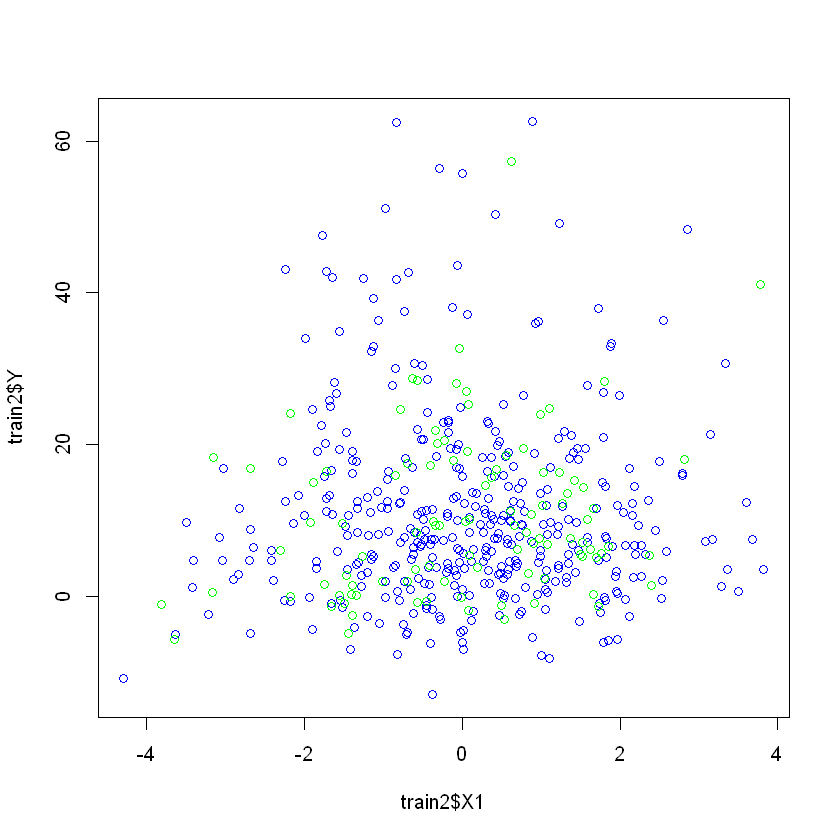

In [156]:
plot(train2$X1,train2$Y, col="blue")
points(test2$X1,test2$Y, col="green")

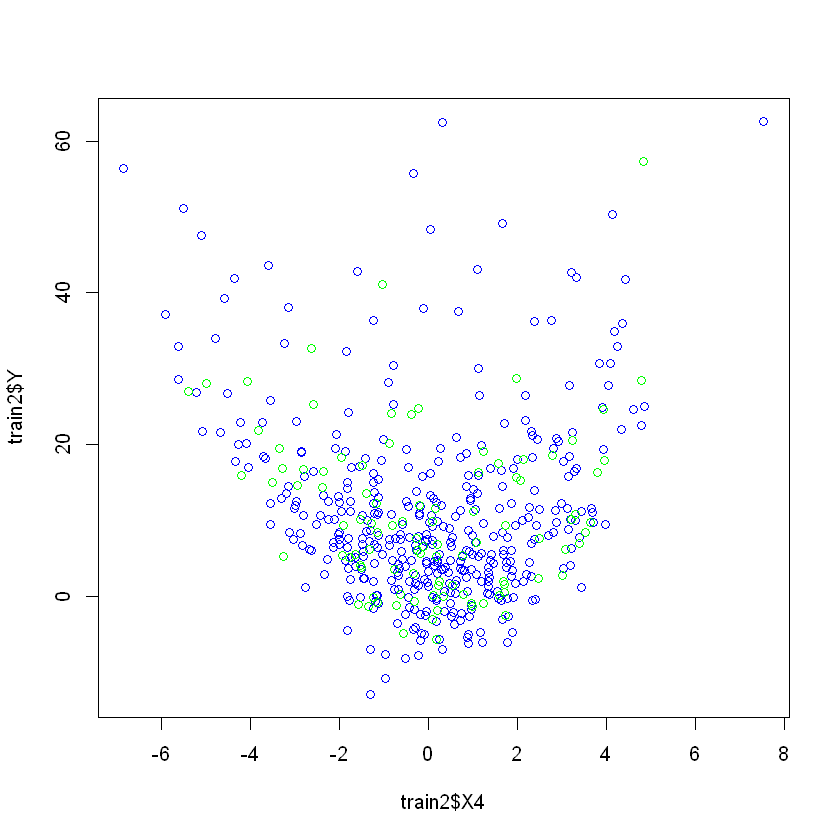

In [157]:
plot(train2$X4,train2$Y, col="blue")
points(test2$X4,test2$Y, col="green")

In [118]:
#Creating the dummy variable
library(tree)
print("Mean of Y variable on Train Data, split criterion")
mean(train2$Y)                                     #taking the mean from Y variable

dummy2 <-ifelse(train2$Y<=mean(train2$Y),F,T)      #creating the new dummy variable for the train data
dummy.test2 <-ifelse(test2$Y<=mean(train2$Y),F,T)  #creating the new dummy variable for the test data

dummy2 <-as.factor(dummy2)                         #changing into categorial variables
dummy.test2 <- as.factor(dummy.test2)

#dummy2
#dummy.test2

#Add new outcome dummy variable of Y into two datasets (train and test)
  Ybin2<-data.frame(train2,dummy2)
  #Ybin
  Ybin.test2 <- data.frame(test2,dummy.test2)
  #Ybin.test

[1] "Mean of Y variable on Train Data, split criterion"


[1] 10.99834


Classification tree:
tree(formula = dummy2 ~ X1 + X2 + X3 + X4 + X5 + X6, data = Ybin2)
Number of terminal nodes:  22 
Residual mean deviance:  0.3875 = 146.5 / 378 
Misclassification error rate: 0.085 = 34 / 400 

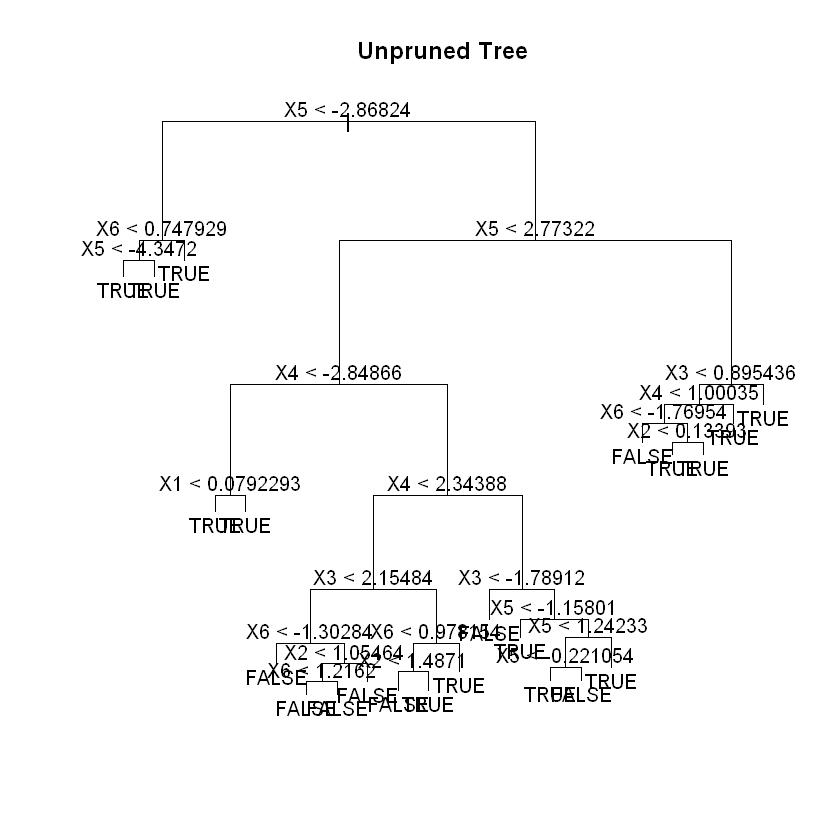

In [121]:
#Building the tree
tree.fit2<-tree(dummy2~X1+X2+X3+X4+X5+X6,data=Ybin2)      

summary2 <-summary(tree.fit2)                             #summary of the tree
summary2

plot(tree.fit2)                                           #plotting the tree
text(tree.fit2, pretty=0)
title(main="Unpruned Tree")

In [122]:
#Test how good the fitted tree does on the Test data
tree.pred2<-predict(tree.fit2,Ybin.test2,type="class")
#tree.pred
table2<-table(tree.pred2,dummy.test2)
table2

corrpred2 <-(table2[1,1]+table2[2,2])/(table2[1,1]+table2[2,2]+table2[1,2]+table2[2,1]) 
print("Accuracy for Test Data, Unpruned Tree")
corrpred2                                              #share of correct predictions
testerror.tree2 <-1-corrpred2 
print("Misclassification Error on Test Data, Unpruned Tree")
testerror.tree2   

          dummy.test2
tree.pred2 FALSE TRUE
     FALSE    51   11
     TRUE      9   29

[1] "Accuracy for Test Data, Unpruned Tree"


[1] 0.8

[1] "Misclassification Error on Test Data, Unpruned Tree"


[1] 0.2

### Boosting

-  Boosting with the new data generating process.

Stochastic Gradient Boosting 

400 samples
  6 predictor
  2 classes: 'FALSE', 'TRUE' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 361, 359, 360, 360, 360, 360, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  Accuracy   Kappa    
  1                   50      0.8324854  0.6315391
  1                  100      0.8567417  0.6905396
  1                  150      0.8633912  0.7070203
  2                   50      0.8508260  0.6797905
  2                  100      0.8717917  0.7245177
  2                  150      0.8785011  0.7395343
  3                   50      0.8701027  0.7222185
  3                  100      0.8769596  0.7377297
  3                  150      0.8743558  0.7319547

Tuning parameter 'shrinkage' was held constant at a value of 0.1

Tuning parameter 'n.minobsinnode' was held constant at a value of 10
Accuracy was used to select the optimal model using the largest value.
The final valu

,var,rel.inf
,<chr>,<dbl>
X5,X5,42.878906
X4,X4,28.400243
X6,X6,10.961826
X3,X3,10.507861
X2,X2,5.331105
X1,X1,1.920059


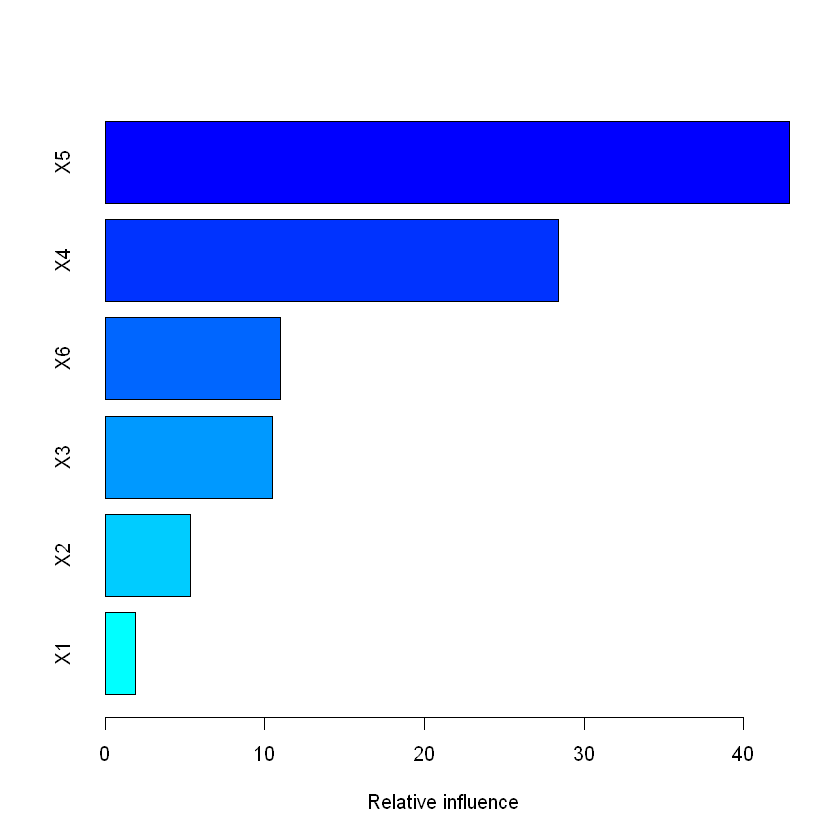

In [123]:
set.seed(231)

library(caret)
library(e1071)

tree.gbm2 <- caret::train(dummy2 ~ X1+X2+X3+X4+X5+X6,                     #creating a boosted tree
                          data = Ybin2,
                          method = "gbm",
                          trControl = trainControl(method = "repeatedcv", 
                                                  number = 10,            #10 fold cross validation 
                                                  repeats=3,              #number of repeats
                                                  verboseIter = FALSE),
                                                  verbose = 0)
tree.gbm2
summary(tree.gbm2)

-  $X_5$ is by far the most influental regressor, whereas $X_1$ has almost no relative influence.

In [127]:
#Test how good the boosted fitted tree does on Test data
matrix2 <- caret::confusionMatrix(
  data = predict(tree.gbm2, Ybin.test2),
  reference = Ybin.test2$dummy.test2)

table.boost2 <- matrix2$table                                 #creating a table to extract the misslasification error            
table.boost2                                                  #table with predictions

corrpred.boost2<-(table.boost2[1,1]+table.boost2[2,2])/(table.boost2[1,1]+table.boost2[2,2]+table.boost2[1,2]+table.boost2[2,1]) 
print("Accuracy on Test Data, Boosted Tree")
corrpred.boost2                                               #share of correct predictions
testerror.boost2<-1-corrpred.boost2
print("Misclassification Error on Test Data, Boosted Tree")
testerror.boost2    

          Reference
Prediction FALSE TRUE
     FALSE    58    5
     TRUE      2   35

[1] "Accuracy on Test Data, Boosted Tree"


[1] 0.93

[1] "Misclassification Error on Test Data, Boosted Tree"


[1] 0.07

[1] "Misclassification Error for the Test Data, Unrpuned Tree, new DGP"


[1] 0.2

[1] "Misclassification Error for the Test Data, Boosted Tree, new DGP"


[1] 0.07

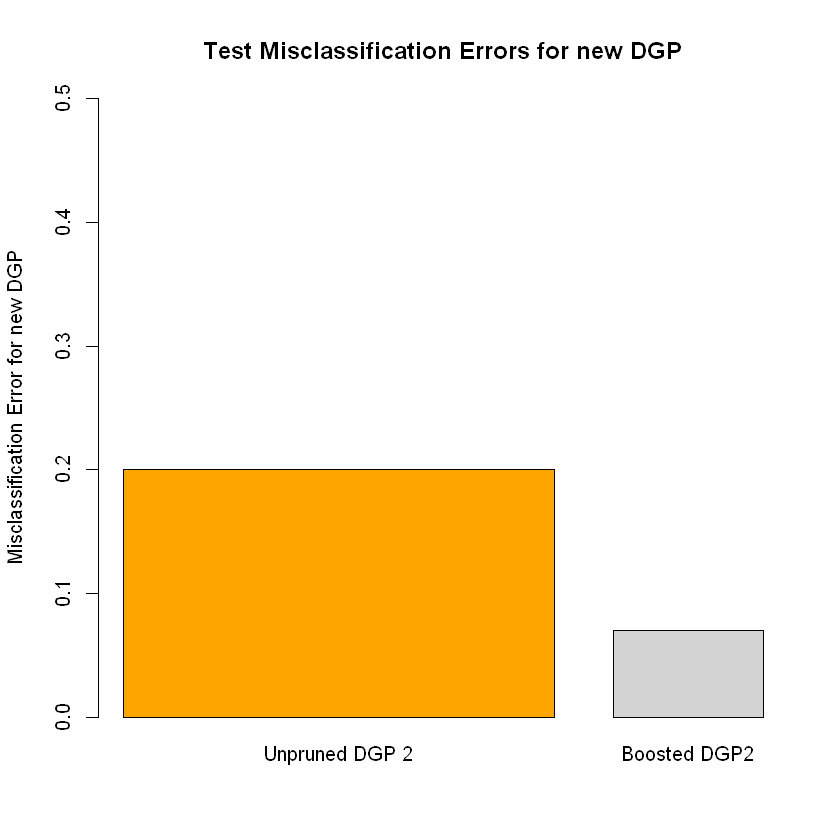

In [158]:
error.test <- c(testerror.tree2,testerror.boost2)           
barplot(error.test, main="Test Misclassification Errors for new DGP", ylim=c(0,0.5),            #plotting
        ylab="Misclassification Error for new DGP", names.arg = c("Unpruned DGP 2","Boosted DGP2"), col=c("orange", "lightgrey"),height=error.test)
print("Misclassification Error for the Test Data, Unrpuned Tree, new DGP")
testerror.tree2
print("Misclassification Error for the Test Data, Boosted Tree, new DGP")
testerror.boost2

-  The Misclassificatoin Error is much lower for the Boosted Tree than for the Unpruned Tree. This matches our assumption for the new data generating process. 

[1] "Misclassification Error for the Test Data, Unpruned Tree, DGP1"


[1] 0.22

[1] "Misclassification Error for the Test Data, Boosted Tree, DGP1"


[1] 0.15

[1] "Misclassification Error for the Test Data, Unpruned Tree, DGP2"


[1] 0.2

[1] "Misclassification Error for the Test Data, Boosted Tree, DGP2"


[1] 0.07

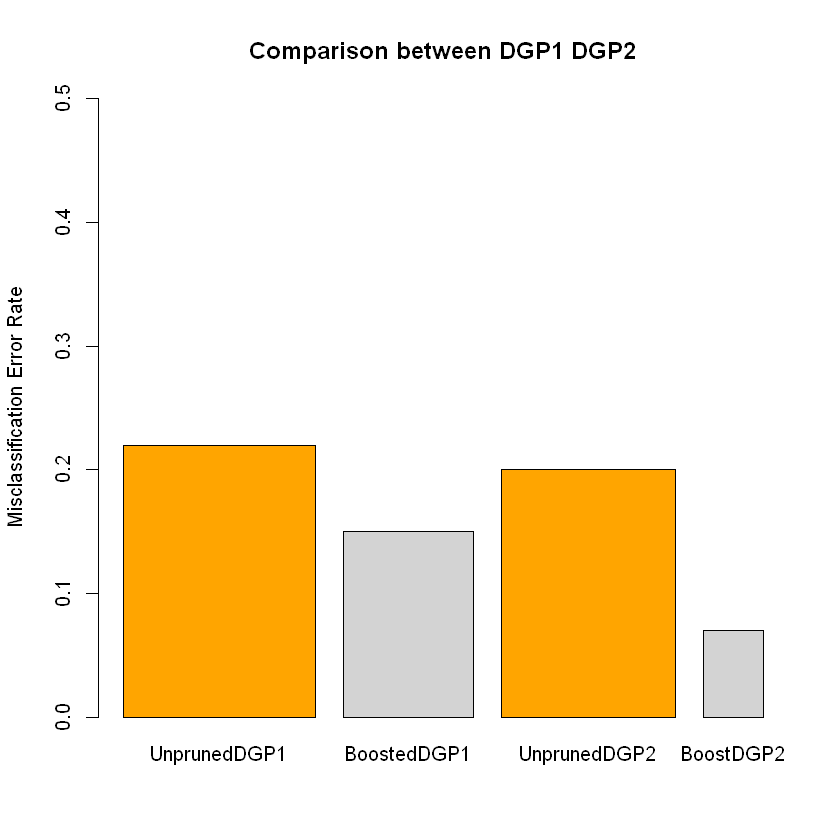

In [161]:
error.test <- c(testerror.tree,testerror.boost,testerror.tree2,testerror.boost2)           
barplot(error.test, main="Comparison between DGP1 DGP2", ylim=c(0,0.5),            #plotting
        ylab="Misclassification Error Rate", names.arg = c("UnprunedDGP1","BoostedDGP1", "UnprunedDGP2", "BoostDGP2"), col=c("orange", "lightgrey"),height=error.test)
print("Misclassification Error for the Test Data, Unpruned Tree, DGP1")
testerror.tree
print("Misclassification Error for the Test Data, Boosted Tree, DGP1")
testerror.boost

print("Misclassification Error for the Test Data, Unpruned Tree, DGP2")
testerror.tree2
print("Misclassification Error for the Test Data, Boosted Tree, DGP2")
testerror.boost2

-  The relative improvement is much bigger for the new data generating process.

### Bagging Method

- Bagging is a straight forward algorithm in which $B$ bootstrap copies of the original training data are created. When dealing with a classification problem, the base learner predictions are combined using majority vote or by averaging the estimated class probabilities together. Because of the aggregation process, bagging effectively reduces the variance. 

In [171]:
trCtrl <- trainControl(method = "cv", number = 10)                            #10 fold cross validation method
tree.bag <- train(dummy2~X1+X2+X3+X4+X5+X6, data = Ybin2, method = "treebag", 
               trControl = trCtrl, metric = "Accuracy")

print(tree.bag)

Bagged CART 

400 samples
  6 predictor
  2 classes: 'FALSE', 'TRUE' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 360, 360, 359, 361, 360, 360, ... 
Resampling results:

  Accuracy   Kappa   
  0.8500422  0.682583



In [172]:
bag.accuracy <- 0.8500422
print("Accuracy on Train Data, Bagging")
bag.accuracy
bag.error<-1- bag.accuracy
print("Misclassification Error on Train Data, Bagging")
bag.error

[1] "Accuracy on Train Data, Bagging"


[1] 0.8500422

[1] "Misclassification Error on Train Data, Bagging"


[1] 0.1499578

In [173]:
#Testing

tree.bag.pred <- predict(tree.bag, Ybin.test2)                                  # performance evaluation on test data

cr.df <- data.frame(predicted = tree.bag.pred, actual = Ybin.test2$dummy.test2) # storing in data frame

cr.mx<-as.matrix.noquote(cr.df)                                                 # creating a matrix out of the data frame

new <- ifelse(cr.df$predicted==cr.df$actual, "yes", "no")                       # checking if preditction and actual are equal

#new
accuracy.bag<-length(which(new=="yes"))/100                                     # calculation of accuracy
testerror.bag<-length(which(new=="no"))/100                                     # calculation of the miss-class error

print("Accuracy on Test Data, Bagging")
accuracy.bag
print("Misclassification Error on Test Data, Bagging")
testerror.bag

[1] "Accuracy on Test Data, Bagging"


[1] 0.87

[1] "Misclassification Error on Test Data, Bagging"


[1] 0.13

[1] "Misclassification Error on Test Data, Unpruned"


[1] 0.2

[1] "Misclassification Error on Test Data, Boosted"


[1] 0.07

[1] "Misclassification Error on Test Data, Bagging"


[1] 0.13

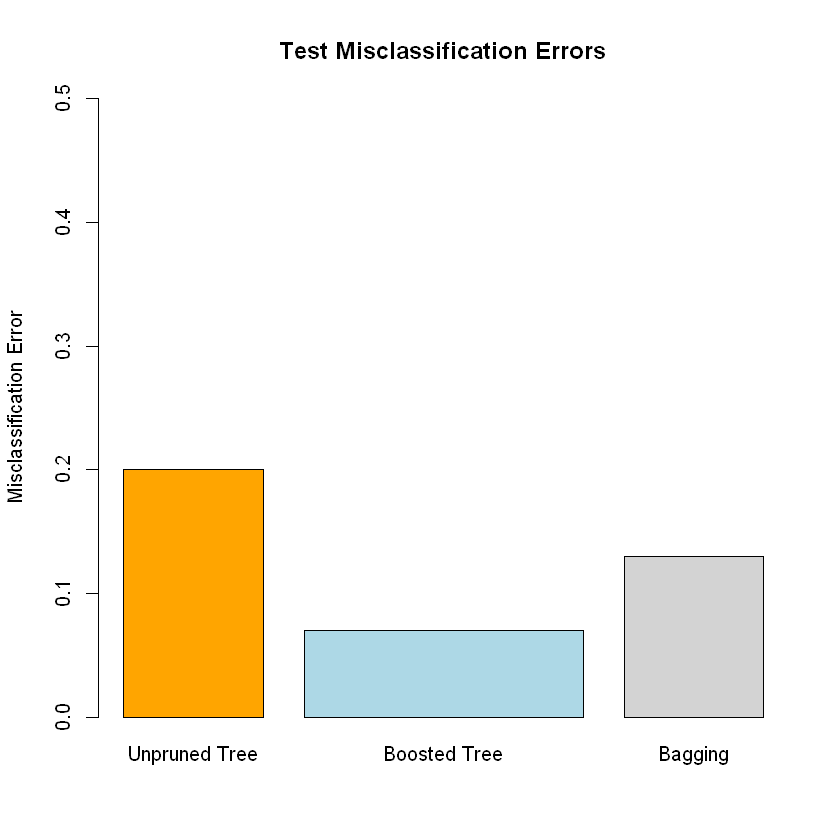

In [175]:
#Comparison
error.test <- c(testerror.tree2,testerror.boost2,testerror.bag)
barplot(error.tree, main="Test Misclassification Errors", ylim=c(0,0.5),
        ylab="Misclassification Error", names.arg = c("Unpruned Tree", "Boosted Tree", "Bagging"), col=c("orange", "lightblue", "lightgrey"),height=error.test)

print("Misclassification Error on Test Data, Unpruned")
testerror.tree2
print("Misclassification Error on Test Data, Boosted")
testerror.boost2
print("Misclassification Error on Test Data, Bagging")
testerror.bag

-  When comparing all of the methods, the Boosted tree does the best, Unpruned Tree the worst and Bagging somewhere in the middle.

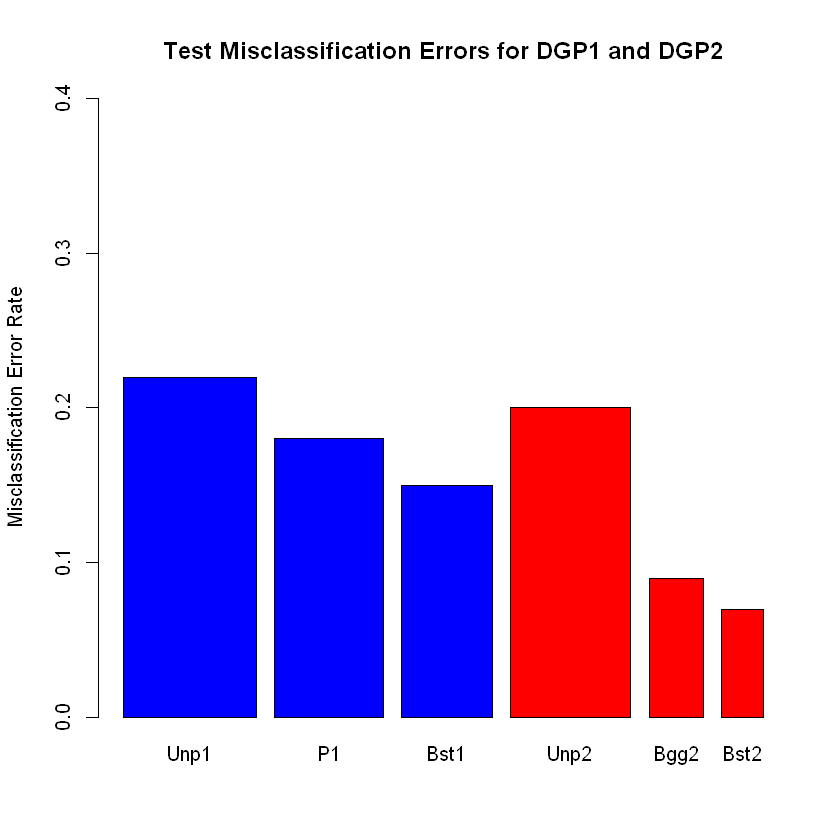

In [139]:
error.test <- c(testerror.tree, testerror.pruned, testerror.boost,testerror.tree2,testerror.bag,testerror.boost2)           
barplot(error.test, main="Test Misclassification Errors for DGP1 and DGP2", ylim=c(0,0.4),           #plotting
        ylab="Misclassification Error Rate", names.arg = c("Unp1","P1","Bst1", "Unp2", "Bgg2","Bst2"), col=c("blue","blue","blue", "red","red","red"),height=error.test)

In [176]:
library(ipred)
library(rpart)
ames_bag1 <- bagging(
  formula = dummy2 ~ X1+X2+X3+X4+X5+X6,
  data = Ybin2,
  nbagg = 1000,  
  coob = TRUE,
  control = rpart.control(minsplit = 2, cp = 0)
)
ames_bag1
abes_bag1$Out-of-bag estimate of misclassification error

Warning message:
"package 'ipred' was built under R version 4.0.5"
Warning message:
"package 'rpart' was built under R version 4.0.5"



Bagging classification trees with 1000 bootstrap replications 

Call: bagging.data.frame(formula = dummy2 ~ X1 + X2 + X3 + X4 + X5 + 
    X6, data = Ybin2, nbagg = 1000, coob = TRUE, control = rpart.control(minsplit = 2, 
    cp = 0))

Out-of-bag estimate of misclassification error:  0.1525 


In [180]:
print("Misclassification Error, Bagging OOB")
out.of.bag.miss <- 0.1525
out.of.bag.miss
print("Misclassification Error on Test Data, Bagging CV")
testerror.bag

[1] "Misclassification Error, Bagging OOB"


[1] 0.1525

[1] "Misclassification Error on Test Data, Bagging CV"


[1] 0.13

-  They are different!

### Works Cited

- James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An introduction to statistical learning: with applications in R.* First edition. New York: Springer.
- "https://bradleyboehmke.github.io/HOML/bagging.html"